# Classification Model Predicting White Wine Quality

## Introduction

<b>Vinho Verde</b> is renowned for its savoury taste, fresh colour and stress-relieving benefits. Among the variants of Vinho Verde, white Vinho Verde stood out as the most promising individual in the global market. A study suggests that the global dry white wine industry surged in 2022 and is expected to maintain an upward trend until 2030 (Market Reports World, 2023). This urging demand in the dry white wine market made quality classification daily more significant; therefore, we have designed a k-nearest-neighbor classification model that determines the quality of the Vinho Verde regarding the wine’s chemical ingredients with reasonable accuracy.

In our project, we will try to answer the question: <u>“How can we predict the level of quality of the White Vinho Verde given the physicochemical attributes in our dataset?”</u>

We utilized the <b>Wine Quality</b> dataset from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/), which features 11 physicochemical attributes of wines, such as fixed acidity, citric acid, residual sugar, density, a quality variable, etc.

Most of the variables, besides the “wine quality” variable, are quantitative. Our dataset focuses on the white variant of Vinho Verde, in which most of the variables are measured in grams/dm^3, with the exceptions of free_sulfur_dioxide (milligrams/dm^3), total_sulfur_dioxide (milligrams/dm^3), and pH (represented on a scale from 0 to 14) (Cortez, Cerdeira, Almeida, Matos, & Reis, 2009). Additionally, the dataset contains 4898 observations without any non-applicable values. Our project involves cleaning and preprocessing the Vinho Verde dataset, implementing appropriate algorithms, k-tuning, and k-nearest-neighbor classification models for wine quality predictions on a scale from 1 to 10 with increasing quality evaluation.

In summary, this document provides a thorough list of procedures for our development of an accurate white Vinho Verde wine quality classification model.  


## Methods & Results

In [16]:
install.packages("themis")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [23]:
# Run This Cell Before Continuing
set.seed(9999) 
library(repr)
library(tidyverse)
library(tidymodels)
library(themis)
library(janitor)
library(cowplot)

ERROR: Error in library(janitor): there is no package called ‘janitor’


Downloading the data to use during our Analysis.

In [20]:
url <- "https://raw.githubusercontent.com/TrBili/dsci-100-project/main/data_2/winequality-white.csv"
download.file(url, "data/winequality-white.csv")

Extracting the data from the downloaded file

In [21]:
wine_data_raw <- read_csv2("data/winequality-white.csv")

head(wine_data_raw)

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 4898 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (6): volatile acidity, citric acid, residual sugar, chlorides, density, ...
dbl (1): quality
num (5): fixed acidity, free sulfur dioxide, total sulfur dioxide, pH, alcohol

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,88,6
63,0.3,0.34,1.6,0.049,14,132,0.994,33,0.49,95,6
81,0.28,0.4,6.9,0.05,30,97,0.9951,326,0.44,101,6
72,0.23,0.32,8.5,0.058,47,186,0.9956,319,0.4,99,6
72,0.23,0.32,8.5,0.058,47,186,0.9956,319,0.4,99,6
81,0.28,0.4,6.9,0.05,30,97,0.9951,326,0.44,101,6


We can see that some numerical variables have a `chr` data type; hence, we need to make it numeric to use later in our model. We can also see that the names of variables have spaces; hence, we need to make them suitable for use. Finally, we have to make the `quality` column, a factor as we will use it as our Class (categorical variable) during this analysis. 

We will now clean our data to make it suitable for Exploratory Data Analysis.

In [22]:
wine_data <- wine_data_raw |> 
                clean_names() |>                        
                drop_na() |> # removes rows with NA 
                map_df(as.numeric) |> # as all our columns are numeric
                mutate(quality = as_factor(quality)) # we will use quality as our class
                

head(wine_data)

ERROR: Error in clean_names(wine_data_raw): could not find function "clean_names"


All the unique values in the quality column

In [21]:
wine_data |> distinct(quality)

quality
<fct>
6
5
7
8
4
3
9


Using the clean data, we will spit our data into training & testing set, then perform exploratory data analysis. 

In [22]:
# Set the seed. Don't remove this!
set.seed(9999) 

wine_split <- initial_split(wine_data, prop=0.75,strata=quality)

## Training Data
wine_train <- training(wine_split)

## Testing Data
wine_test <- testing(wine_split)

head(wine_train)
head(wine_test)

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,p_h,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
81,0.27,0.41,1.45,0.033,11,63,0.9908,299,0.56,12,5
86,0.23,0.40,4.20,0.035,17,109,0.9947,314,0.53,97,5
79,0.18,0.37,1.20,0.040,16,75,0.9920,318,0.63,108,5
83,0.42,0.62,19.25,0.040,41,172,1.0002,298,0.67,97,5
62,0.66,0.48,1.20,0.029,29,75,0.9892,333,0.39,128,8
76,0.67,0.14,1.50,0.074,25,168,0.9937,305,0.51,93,5


fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,p_h,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7,0.27,0.36,20.7,0.045,45,170,1.0010,3,0.45,88,6
65,0.31,0.14,7.5,0.044,34,133,0.9955,322,0.50,95,5
68,0.26,0.42,1.7,0.049,41,122,0.9930,347,0.48,105,8
66,0.27,0.41,1.3,0.052,16,142,0.9951,342,0.47,10,6
69,0.24,0.35,1.0,0.052,35,146,0.9930,345,0.44,10,6
85,0.24,0.39,10.4,0.044,20,142,0.9974,32,0.53,10,6


We will now be doing Exploratory Data Analysis on our training set.

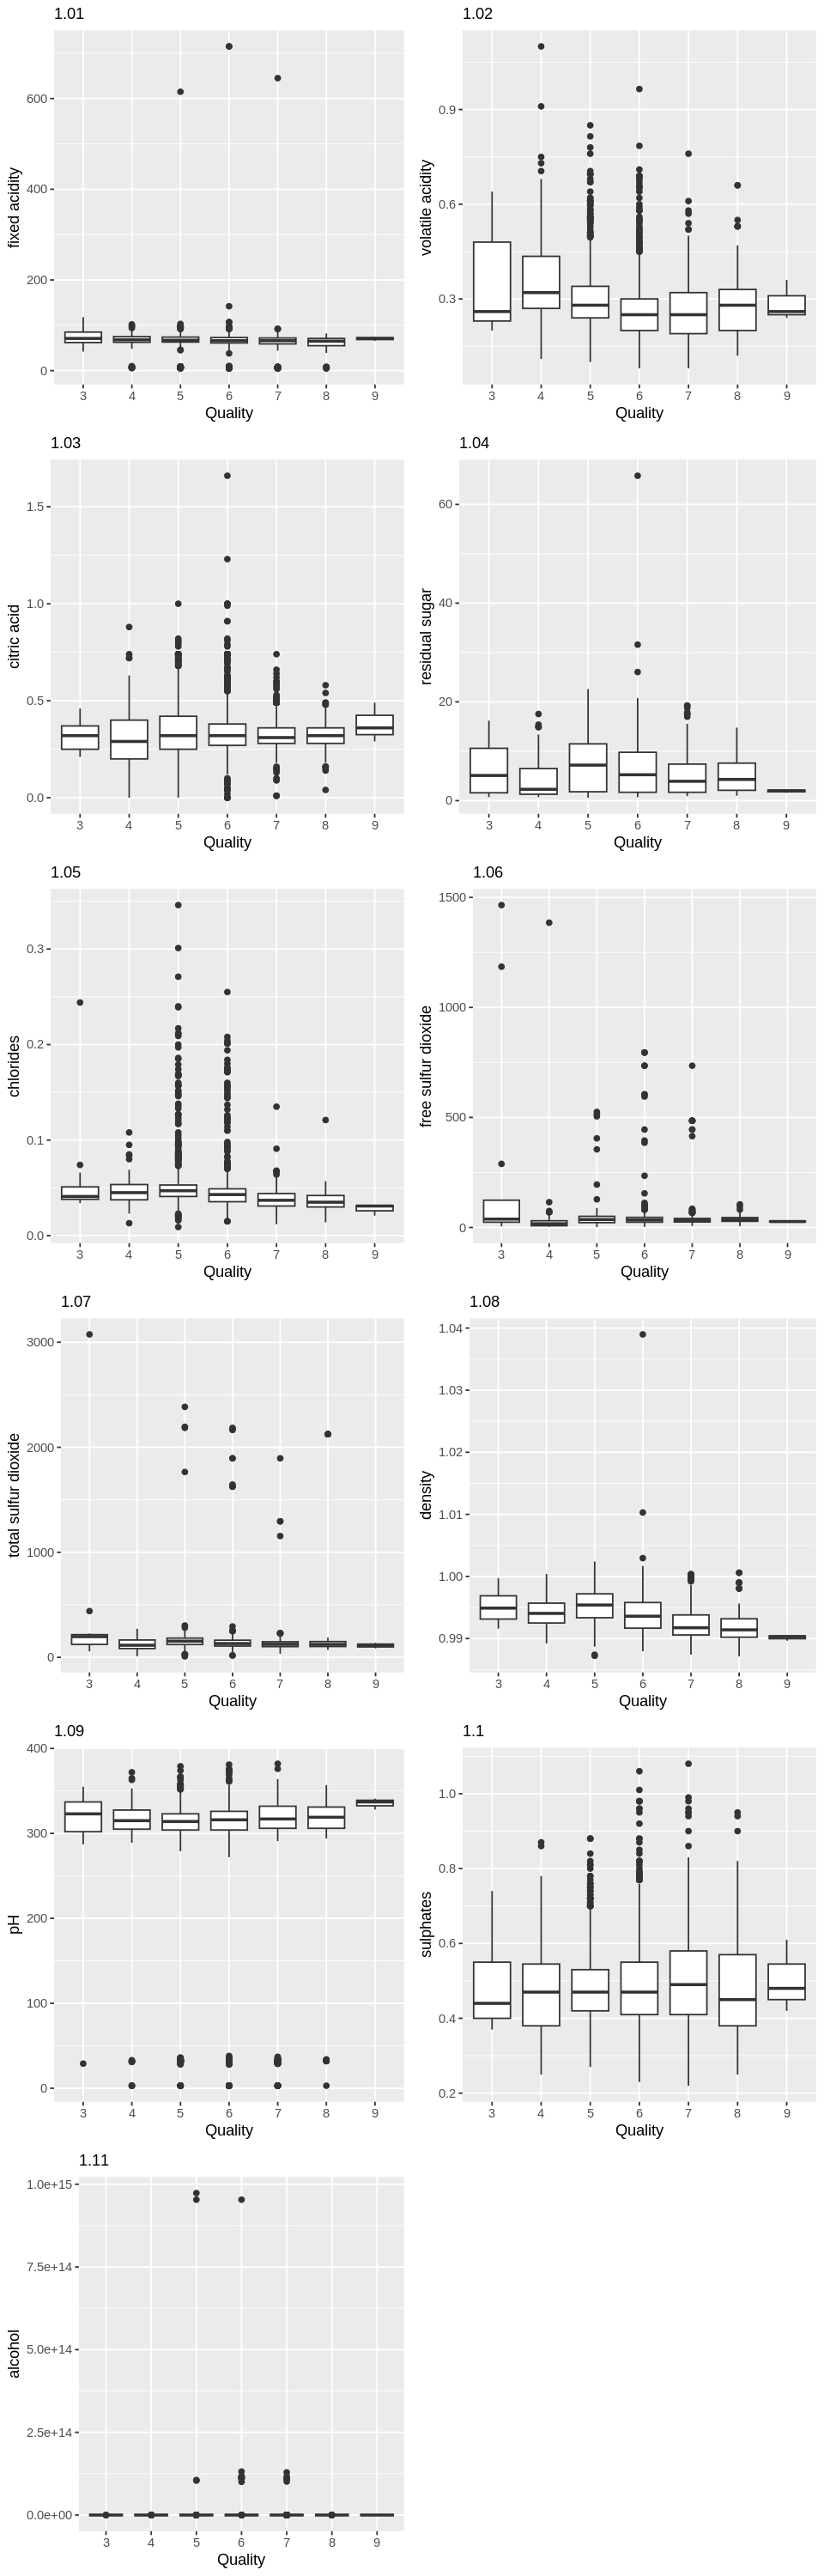

In [23]:
## Setting the Width & Height of the Plot
options(repr.plot.width=8,repr.plot.height=25)

## Extracting all the column names from our clean Dataset
all_cols <- wine_train |> select(-quality) |> colnames()

## Extracting all the column names from our raw Dataset
col_names <- wine_data_raw |> colnames()

## Creating a list to store all our plots
plots <- list()

## Loop Variable
i <- 0

## Looping through each column
for(c in all_cols) {
    i <- i + 1
    c_sym <- sym(c)
    box_plot <- ggplot(wine_train, aes(x=quality,y=!!c_sym)) +
            geom_boxplot() +
            labs(x="Quality", y=col_names[i], subtitle=(100 + i)/100)
    plots[[c]] <- box_plot
}

## Merging all the plots
plot_grid(plotlist = plots, ncol = 2)

Observing the box plots above, the median/length appears to be different between the boxes, which implies that the variable has a high effect on the response variable.

Observing the boxplot above, we can choose the following attributes.
1. Volatile Acidity
2. Citric Acid
3. Residual Sugar
4. Sulphates

We will now perform a summary analysis on our selected predictors from our training data, to further distinguish between relevant predictors.

In [24]:
## selecting the required variables
selected_wine_train_data <- wine_train |> 
                    select(quality, volatile_acidity, citric_acid, residual_sugar, sulphates)


## Summary of Training Data - Mean of Each Column & Count of Each Quality
summary_wine_train_data <- wine_train |>
                    group_by(quality) |>
                    summarize(mean_volatile_acidity = mean(volatile_acidity),
                             mean_citric_acid = mean(citric_acid),
                             mean_residual_sugar = mean(residual_sugar),
                             mean_sulphates = mean(sulphates),
                             total_count=n(),
                             percentage=(100*n()/nrow(wine_train)))

summary_wine_train_data
print("Summary Table 1")

quality,mean_volatile_acidity,mean_citric_acid,mean_residual_sugar,mean_sulphates,total_count,percentage
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
3,0.3388462,0.3123077,6.303846,0.4953846,13,0.3539341
4,0.3712605,0.3110924,4.562185,0.4784874,119,3.2398584
5,0.3026685,0.3397814,7.413661,0.4832423,1098,29.8938198
6,0.2609563,0.3398846,6.383849,0.4901882,1647,44.8407296
7,0.2656024,0.3261145,5.287199,0.5022289,664,18.0778655
8,0.2836047,0.3261240,5.593798,0.4753488,129,3.5121154
9,0.2866667,0.3800000,1.933333,0.5033333,3,0.0816771


[1] "Summary Table 1"


The summary table above shows that our selected predictors have variations with `quality`. 

Total Count: The `total_count` column indicates the number of observations for each quality level. A significant imbalance is evident, with much more data for quality levels 5 and 6 compared to others. This could potentially bias a KNN model, and we might need to consider methods to address this class imbalance, such as upsampling.

Percentage: This column shows the percentage of observations in each quality level relative to the entire dataset. Quality 5 and 6 make up a large percentage of the data, indicating that the dataset is imbalanced, which could influence the KNN classifier's performance.

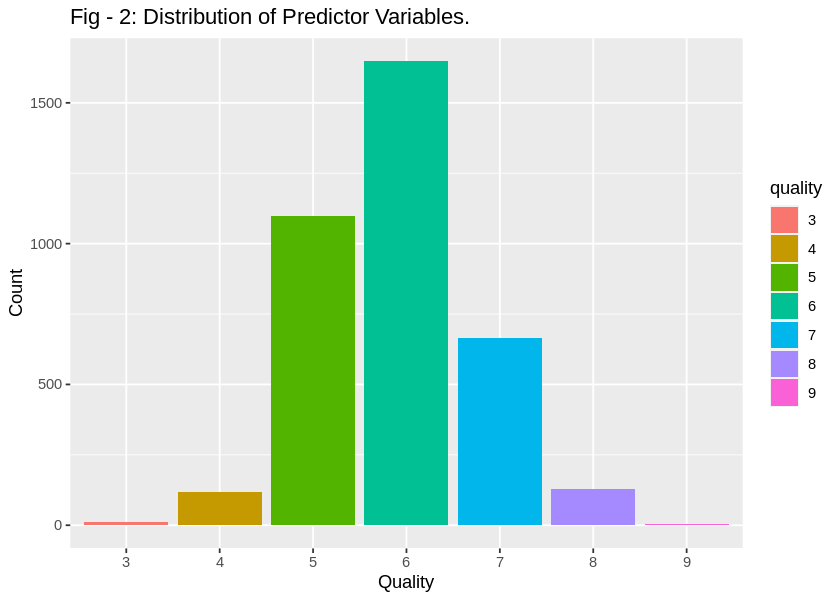

In [40]:
options(repr.plot.width=7, repr.plot.height=5)

count_plot <- summary_wine_train_data |>
            ggplot(aes(x=quality,y=total_count,fill=quality)) +
            geom_bar(stat="identity") +
            labs(x="Quality",y="Count") +
            ggtitle("Fig - 2: Distribution of Predictor Variables.")

count_plot

Using the above bar graph, we can easily see that our qualities are not distributed properly.

<hr></hr>

We will start by creating a recipe that rebalances our dataset by oversampling all the qualities and maintains a 1:1 ratio.

In [25]:
# Set the seed. Don't remove this!
set.seed(9999) 

wine_recipe <- recipe(quality ~ quality + volatile_acidity + citric_acid + residual_sugar + sulphates, data = wine_train) |>
                step_upsample(quality, over_ratio = 1, skip=FALSE) |>
                prep()

upsampled_wine_train <- bake(wine_recipe, wine_train)

summary_wine_train_data2 <- upsampled_wine_train |>
                    group_by(quality) |>
                    summarize(total_count=n(),
                             percentage=(100*n()/nrow(wine_train)))

summary_wine_train_data2
print("Summary Table 2")

quality,total_count,percentage
<fct>,<int>,<dbl>
3,1647,44.84073
4,1647,44.84073
5,1647,44.84073
6,1647,44.84073
7,1647,44.84073
8,1647,44.84073
9,1647,44.84073


[1] "Summary Table 2"


We can see in the summary table above, that all our class values are balanced now, we will use this upsampled data to create a recipe which scales all the predictors, and makes it ready for training the model.

In [26]:
wine_recipe_upsampled <- recipe(quality ~ quality + volatile_acidity + citric_acid + residual_sugar + sulphates, data = upsampled_wine_train) |>
                        step_scale(all_predictors()) |>
                        step_center(all_predictors())

In order to obtain the optimal k value for k-nearest-neighbor classification algorithm, we apply cross validation that divides the training data set into 5 validation sets (5-fold cross validation). Having multiple training sets would allows us to acquire a more precise calculation of the accuracy of the classification model, which aids us in finding the best k-neighbor.

In [32]:
# Set the seed. Don't remove this!
set.seed(1234) 

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

k_vals <- tibble(neighbors = seq(from=1,to=10,by=1))

wine_train_vfold <- vfold_cv(upsampled_wine_train, v=5,strata=quality)

vfold_metrics <- workflow() |>
                    add_recipe(wine_recipe_upsampled) |>
                    add_model(knn_spec) |>
                    tune_grid(resamples=wine_train_vfold, grid=k_vals) |>
                    collect_metrics()

accuracies <- vfold_metrics |> filter(.metric=="accuracy")

accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.9140447,5,0.001501568,Preprocessor1_Model01
2,accuracy,multiclass,0.9142183,5,0.001460256,Preprocessor1_Model02
3,accuracy,multiclass,0.8580992,5,0.002459592,Preprocessor1_Model03
4,accuracy,multiclass,0.8483867,5,0.001979608,Preprocessor1_Model04
5,accuracy,multiclass,0.8220174,5,0.003123377,Preprocessor1_Model05
6,accuracy,multiclass,0.8133420,5,0.002121756,Preprocessor1_Model06
7,accuracy,multiclass,0.7950386,5,0.001175203,Preprocessor1_Model07
8,accuracy,multiclass,0.7904438,5,0.001072522,Preprocessor1_Model08
9,accuracy,multiclass,0.7778655,5,0.000909826,Preprocessor1_Model09


Seeing, the accuracy table, we can already see that K=2, would be the best. We will plot a line graph to visualise this.

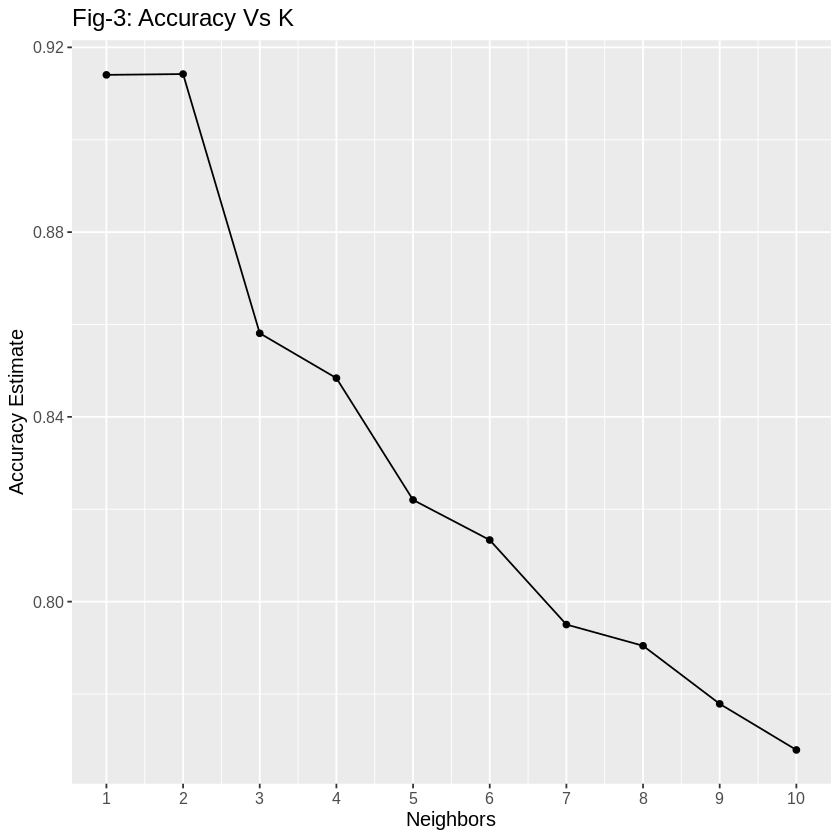

In [42]:
options(repr.plot.width=7,repr.plot.height=7)

accuracy_vs_k <- ggplot(accuracies, aes(x=neighbors, y=mean)) +
                    geom_point() +
                    geom_line() +
                    labs(x="Neighbors", y="Accuracy Estimate") +
                    scale_x_continuous(limits=c(1,10), breaks=1:10) +
                    theme(text=element_text(size=12)) +
                    ggtitle("Fig-3: Accuracy Vs K")
accuracy_vs_k

According to the above accuracy vs k-neighbors line plot (Fig-3), we observe that the curve peaks at k= 2, which provides an indication that our classification model would return the most accurate predictions at k=2. As a result, we retrained the training dataset with a neighbor of k= 2.

In [43]:
# Set the seed. Don't remove this!
set.seed(9999) 

#recreating spec with best K
wine_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 2) |>
            set_engine("kknn") |>
            set_mode("classification")

#recreating the model with the new recipe
wine_fit <- workflow() |>
            add_recipe(wine_recipe_upsampled) |>
            add_model(wine_spec) |>
            fit(data=wine_test)


#predicting the results of wine_test data
wine_test_predictions <- predict(wine_fit, wine_test) |>
                            bind_cols(wine_test)

head(wine_test_predictions)

.pred_class,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,p_h,sulphates,alcohol,quality
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6,7,0.27,0.36,20.7,0.045,45,170,1.0010,3,0.45,88,6
5,65,0.31,0.14,7.5,0.044,34,133,0.9955,322,0.50,95,5
8,68,0.26,0.42,1.7,0.049,41,122,0.9930,347,0.48,105,8
6,66,0.27,0.41,1.3,0.052,16,142,0.9951,342,0.47,10,6
6,69,0.24,0.35,1.0,0.052,35,146,0.9930,345,0.44,10,6
6,85,0.24,0.39,10.4,0.044,20,142,0.9974,32,0.53,10,6


Now we will check the accuracy of the prediction results using metrics and see the table of predicted and correct labels using Confusion Matrix

In [44]:
# filtering the accuracy by comparing the predicted and truth column
wine_test_predictions |> metrics(truth=quality, estimate=.pred_class) |> filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.9983673


In [46]:
# Creating a confusion matrix to understand the distribution of correct and incorrect labels
wine_confusion <- wine_test_predictions |> conf_mat(truth=quality, estimate=.pred_class)
wine_confusion

          Truth
Prediction   3   4   5   6   7   8   9
         3   7   0   0   0   0   0   0
         4   0  44   0   0   0   0   0
         5   0   0 359   1   0   0   0
         6   0   0   0 549   0   0   0
         7   0   0   0   1 216   0   0
         8   0   0   0   0   0  46   0
         9   0   0   0   0   0   0   2

From both the accuracy metrics and the confusion matrix, we can observe that the majority of the inputs were predicted accurately in terms of wine quality. The incorrect predictions occurred with data that has wine quality equals to 6. In fact, the model demonstrated an accuracy of 99.8%, which is a reflection of the success and usefulness of our wine quality classification model.

In [24]:
volatile_acidity_vs_citric_acid_predicted <- wine_test_predictions |> 
    ggplot(aes(x= volatile_acidity, y= citric_acid, color= .pred_class))+
    geom_point()+
    labs(x= "The volatile acidity of the white wine (g/m^3)", y="The citric acid of the white wine (g/m^3)",
        color = "predicted quality") +
    theme(text=element_text(size=12)) +
    ggtitle("Fig-4: The predicted wine quality illustrated by volatile acidity vs citric acid")

volatile_acidity_vs_citric_acid <- wine_test_predictions |> 
    ggplot(aes(x= volatile_acidity, y= citric_acid, color= quality))+
    geom_point()+
    labs(x= "The volatile acidity of the white wine (g/m^3)", y="The citric acid of the white wine (g/m^3)",
        color = "quality") +
    theme(text=element_text(size=12)) +
    ggtitle("Fig-5: The wine quality illustrated by volatile acidity vs citric acid")


ERROR: Error in ggplot(wine_test_predictions, aes(x = volatile_acidity, y = citric_acid, : object 'wine_test_predictions' not found


## Discussion

### Summary of Findings: 

In this project, we documented our procedures for establishing a classification model for predicting wine quality based on the wine’s physicochemical attributes. We performed predictor selection through box plots, implemented 5-fold cross-validation in the decision of the optimal neighbor for the KNN-classification model, trained a classifier based on our pre-obtained training dataset with our optimal k-value of 2, and conducted an accuracy test by inputting testing datasets. The resulting accuracy of 99.8% suggests that our model could be a valuable tool in decision-making processes related to wine quality assessment.

### Expectations & Significance: 

Our objective was to construct a classification model capable of predicting white wine quality with reasonable accuracy. And our results align with the expectations set during the project. The use of physicochemical attributes for wine quality prediction proved to be a viable approach, and the model's accuracy met the anticipated standards. This aligns with the assumption that these attributes play a significant role in determining wine quality.

Our exploration of the dataset and subsequent KNN classification yielded promising results. The model's accuracy indicates its potential usefulness in predicting wine quality. Winemakers and industry stakeholders can leverage these insights to enhance product quality and consumer satisfaction (Mor, Asras, Gal.et al., 2022). The winemakers can adjust the use of the ingredients during the winemaking process to elevate overall wine quality. Meanwhile, by knowing and identifying the factor with minimal impact in the wine-making process, the winemakers can put less effort and money in that and allocate the resources more efficiently, which can save money and time.

Furthermore, our classification model provides a more objective way of judging the quality of a Vinho Verde white wine. Unlike human tasters, the model determines the wine's quality through a precise evaluation of the collected data, enhancing accuracy and eliminating subjective elements in the judgment process. This is because the process of tasting is complex, different people may have completely different criteria for judging the quality of white wine (Barry C Smith, 2019). Human tasters may rely on their personal palate preferences rather than the real and inherent quality of the wine. Therefore, based on the classification model we get, if the human taster gives a totally different result than our classification model, the taster has the opportunity to reassess the white wine, which significantly reduces the probability of erroneous judgments by human experts, increasing the overall reliability and the accuracy of the white wine evaluation process.

### Drawbacks & Questions: 

While an accuracy of 99.8% is significant, it is essential to acknowledge potential limitations and scrutinize the model's performance further. A potential weakness of our classification model is that there exists an imbalance in the distribution of data under each wine quality in our training data; this entails that our model may not be able to produce comparably accurate predictions to these less abundant observations. We have attempted to tackle this problem by using the step_upsample function to achieve a 1:1 ratio for training data selections based on the strata (quality); however, one downside of this approach for our specific dataset is that some of the observations under a specific quality variable are significantly low, which limits the number of selections that we can make for the rest of the observations. Our training dataset lacks observations from quality values of 1, 2, 3, 9, and 10, and this indicates potential inaccuracy if predictions are made on observations with attributes under those 5 wine qualities.

The analysis also leads to further questions, including:
- What are the some other limitations of the model, and can it be applied to other types of wines, such as red wine (Victor,2020) ?
- Are there any other factors affecting wine quality that the model has not considered? Factors such as data quality, feature selection, and many others can influence model accuracy.
- Given that not all available physicochemical attributes were used in the model, do the chosen attributes for the model truly represent the best choice of predictors?
- Will this model be useful in different regions with different climate conditions? Will these factors influence the quality of wine?
  
In conclusion, our classification model offers valuable insights into wine quality prediction. While the current accuracy is promising, ongoing exploration will contribute to its long-term applicability across diverse winemaking scenarios.


## Citations

1. Market research Reports and Industry Analysis Reports - Market Reports World. (2023). Retrieved from www.marketreportsworld.com website: https://www.marketreportsworld.com/enquiry/request-sample/19646179?utm_source=VarikuLinkdenRD
2. Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J. (2009). Modeling wine preferences by data mining from physicochemical properties. Decision Support Systems, 47(4), 547–553. https://doi.org/10.1016/j.dss.2009.05.016
3. Cortez,Paulo, Cerdeira,A., Almeida,F., Matos,T., and Reis,J.. (2009). Wine Quality. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.
4. Mor, N.S., Asras, T., Gal, E., Demasia, T., Tarab, E., Ezekiel, N., Nikapros, O., Semimufar, O., Gladky, E., Karpenko, M., Sason, D., Maslov, D., Mor, O.(2022). Wine Quality and Type Prediction from Physicochemical Properties Using Neural Networks for Machine Learning: A Free Software for Winemakers and Customers. https://doi.org/10.31222/osf.io/ph4cu
5. Victor Ivamoto, (2020). Wine Type and Quality Prediction With Machine Learning.
https://rstudio-pubs-static.s3.amazonaws.com/565136_b4395e2500ec4c129ab776b9e8dd24de.html
6. Barry C Smith, (2019). Getting More Out of Wine: wine experts, wine apps and sensory science.
https://www.sciencedirect.com/science/article/pii/S2214799319300165#sec0035



<hr></hr>